# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

In [165]:
# Про характеристики прочитайте в источнике

X_train.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,course,mother,1,1,0,no,no,no,no,yes,no,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,home,father,3,1,0,no,yes,no,yes,yes,yes,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,home,mother,2,2,1,no,yes,yes,yes,no,yes,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,course,other,2,2,0,no,yes,yes,yes,yes,no,yes,yes,1,2,3,1,2,2,8,12
5,GP,F,17.0,U,GT3,T,2,3,other,other,course,father,2,2,0,no,no,no,yes,yes,yes,yes,yes,4,2,1,1,1,3,2,14
6,MS,F,18.0,U,GT3,T,3,3,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,yes,4,1,3,1,2,1,1,16
7,MS,F,17.0,U,GT3,T,1,1,other,at_home,course,mother,1,1,0,no,yes,no,yes,yes,yes,no,no,4,3,2,1,2,5,9,10
8,GP,F,15.0,U,GT3,T,1,1,other,other,home,father,1,2,0,no,yes,no,yes,no,yes,yes,no,4,3,2,2,3,4,2,12
9,GP,M,18.0,U,GT3,T,2,1,other,other,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,5,2,4,1,2,4,2,16


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

     count
sex       
F      257
M      189
D        5
C        1
B        1
A        1
     count
sex       
F      257
M      189


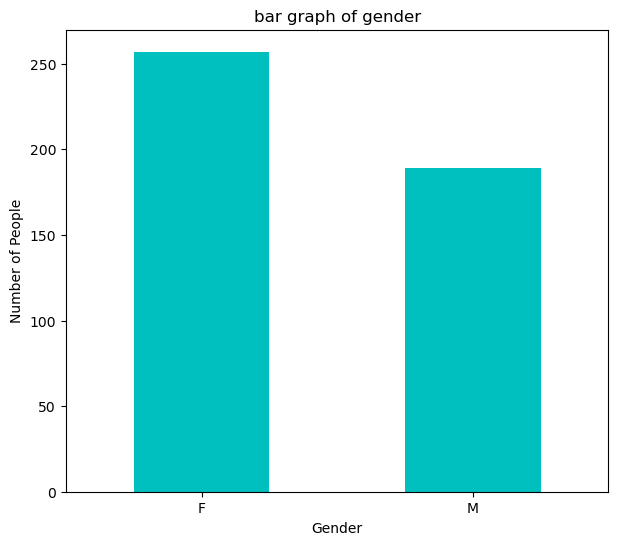

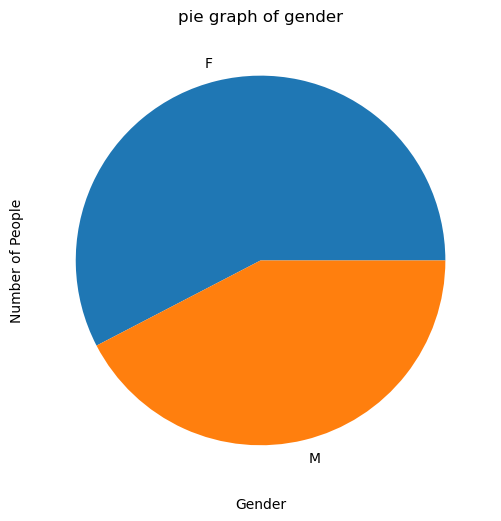

In [166]:
# student_identification_columns = ("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet")
#
# unique_students = X_train.drop_duplicates(subset=student_identification_columns)
# print(len(X_train))
# print(len(unique_students))
# прочитал заметку к данным  there are several (382) students that belong to both datasets . Но кажется что в приложенном файле уже смержены два датасета корректным образом
gender = X_train['sex'].value_counts()
print(gender.to_frame())
for k in ("D", "C", "B", "A"):
    gender.pop(k)
print(gender.to_frame())

graph_types_and_params = {
    "bar graph of gender": {
        "method": gender.plot.bar,
        "params": {"rot": 0, "color": "c"}
    },
    "pie graph of gender": {
        "method": gender.plot.pie,
        "params": {}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(7, 6))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Number of People')
    plt.show()
# Вывел и бар граф и круговую диаграмму. Очистил данные от мусора при выводе - (убрал невалидные значения DCBA)

## Характеристика: "Age"

        count
age          
 17.0     111
 16.0     111
 18.0      95
 15.0      73
 19.0      19
 20.0       6
 21.0       2
 161.0      1
 181.0      1
 151.0      1
 116.0      1
 22.0       1
-1.0        1
 1.0        1
 5.0        1
 8.0        1
      count
age        
17.0    111
16.0    111
18.0     95
15.0     73
19.0     19
20.0      6
21.0      2
22.0      1


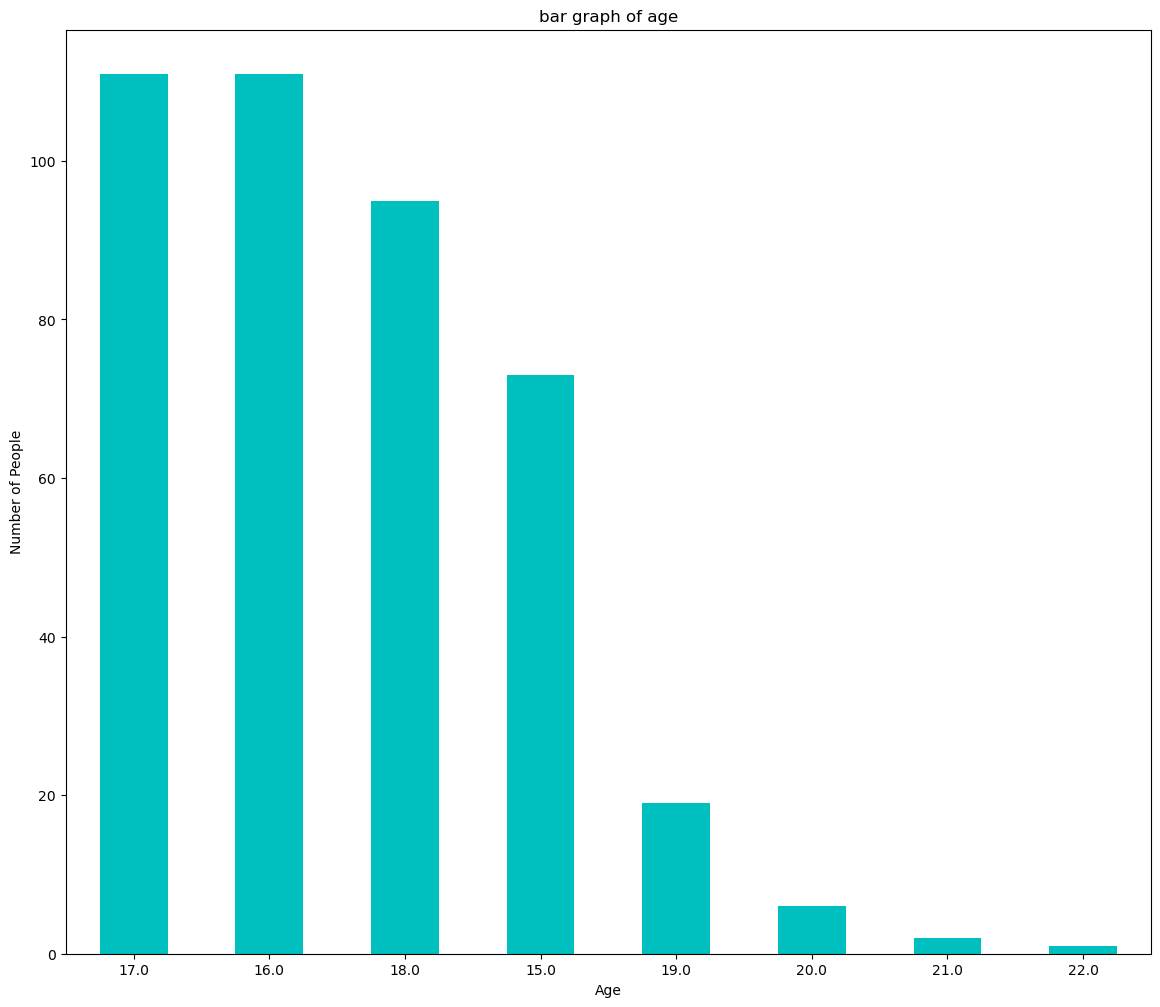

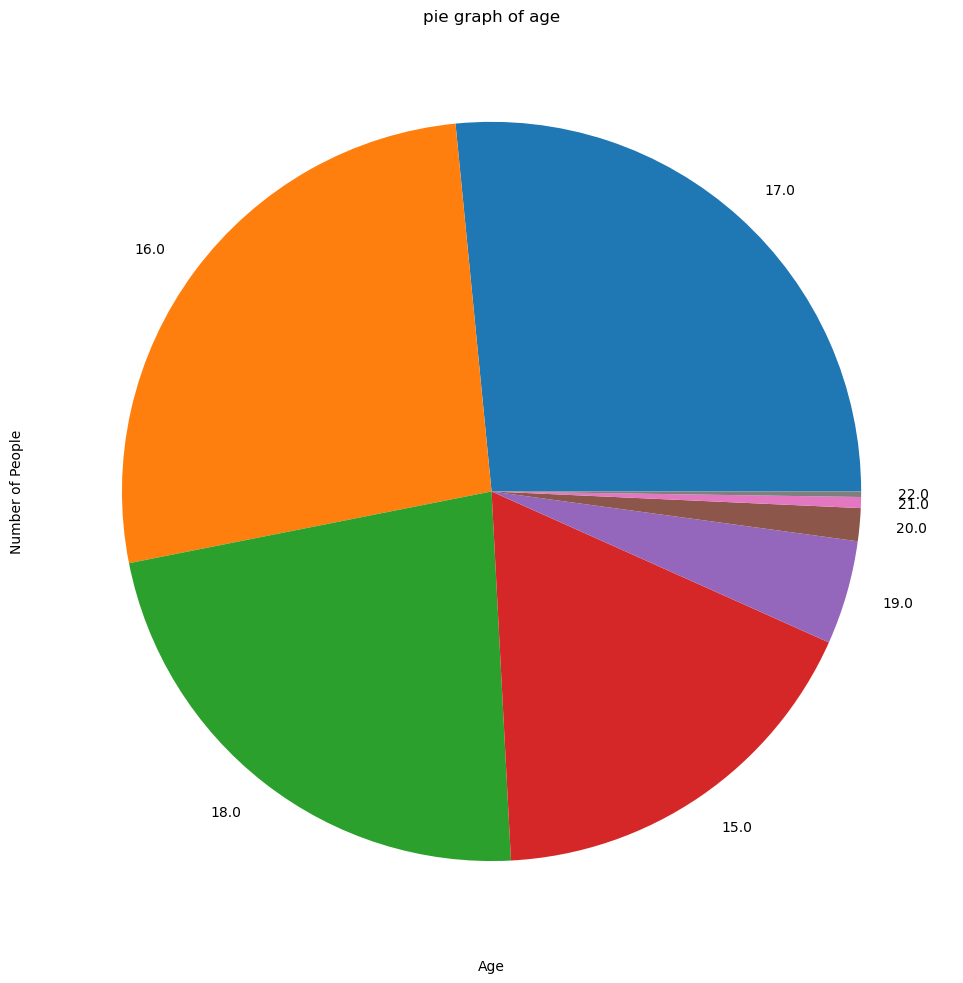

In [167]:
age = X_train['age'].value_counts()
print(age.to_frame())
for k in age.keys():
    if k > 100 or k < 10:
        age.pop(k)

print(age.to_frame())
graph_types_and_params = {
    "bar graph of age": {
        "method": age.plot.bar,
        "params": {"rot": 0, "color": "c"}
    },
    "pie graph of age": {
        "method": age.plot.pie,
        "params": {}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(14, 12))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of People')
    plt.show()
# вывел графики, убрал невалидные значения (вряд ли студенту более 100 лет, как и вряд ли ему менее 10)

## Характеристика: "Weekly study time"

           count
studytime       
1            126
2            170
3             55
4             18


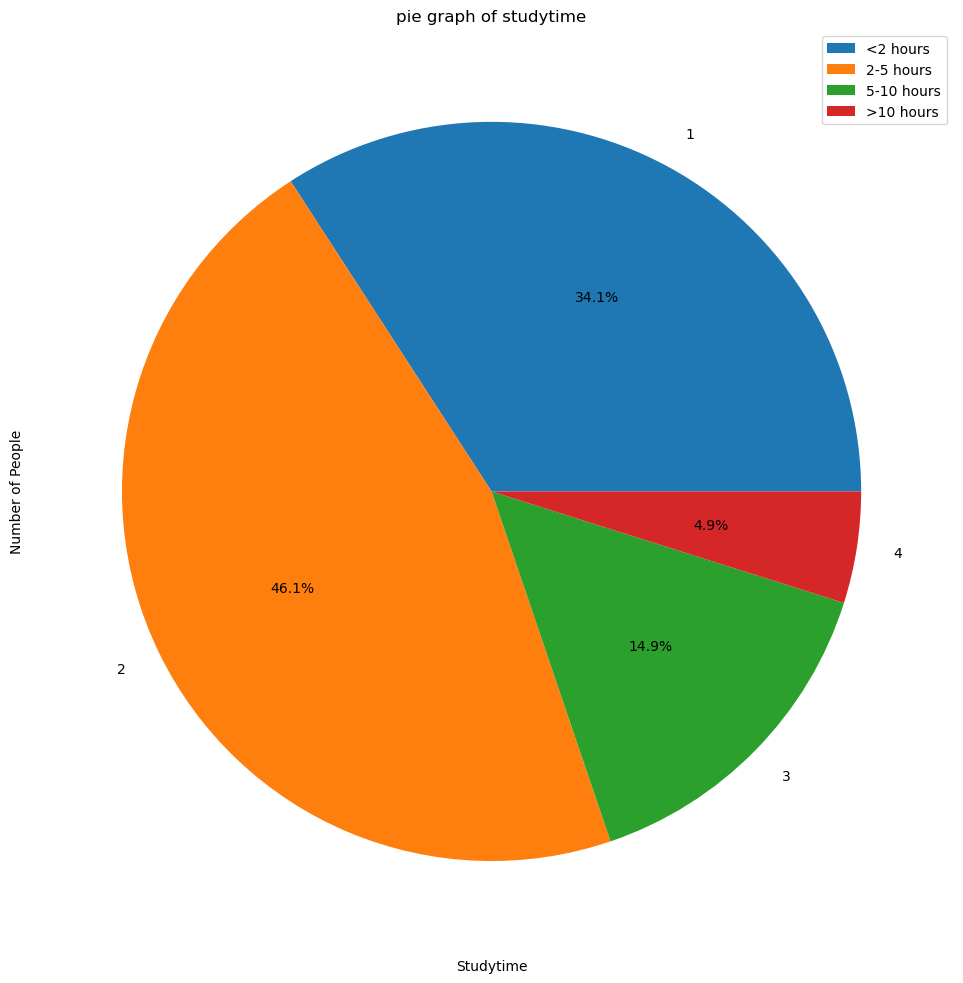

In [364]:
studytime = X_train['studytime'].value_counts()
studytime = studytime.sort_index()
print(studytime.to_frame())


graph_types_and_params = {
    # "bar graph of studytime": {
    #     "method": studytime.plot.bar,
    #     "params": {"rot": 0, "color": "c"}
    # },
    "pie graph of studytime": {
        "method": studytime.plot.pie,
        "params": {"legend": True, "autopct": '%1.1f%%'}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(14, 12))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    ax.set_xlabel('Studytime')
    ax.set_ylabel('Number of People')
    ax.legend(["<2 hours", "2-5 hours", "5-10 hours", ">10 hours"])
    plt.show()
# вывел графики, убрал невалидные значения (вряд ли студенту более 100 лет, как и вряд ли ему менее 10)

## Характеристика: "Romantic Relationship"

          count
romantic       
no          289
yes         165


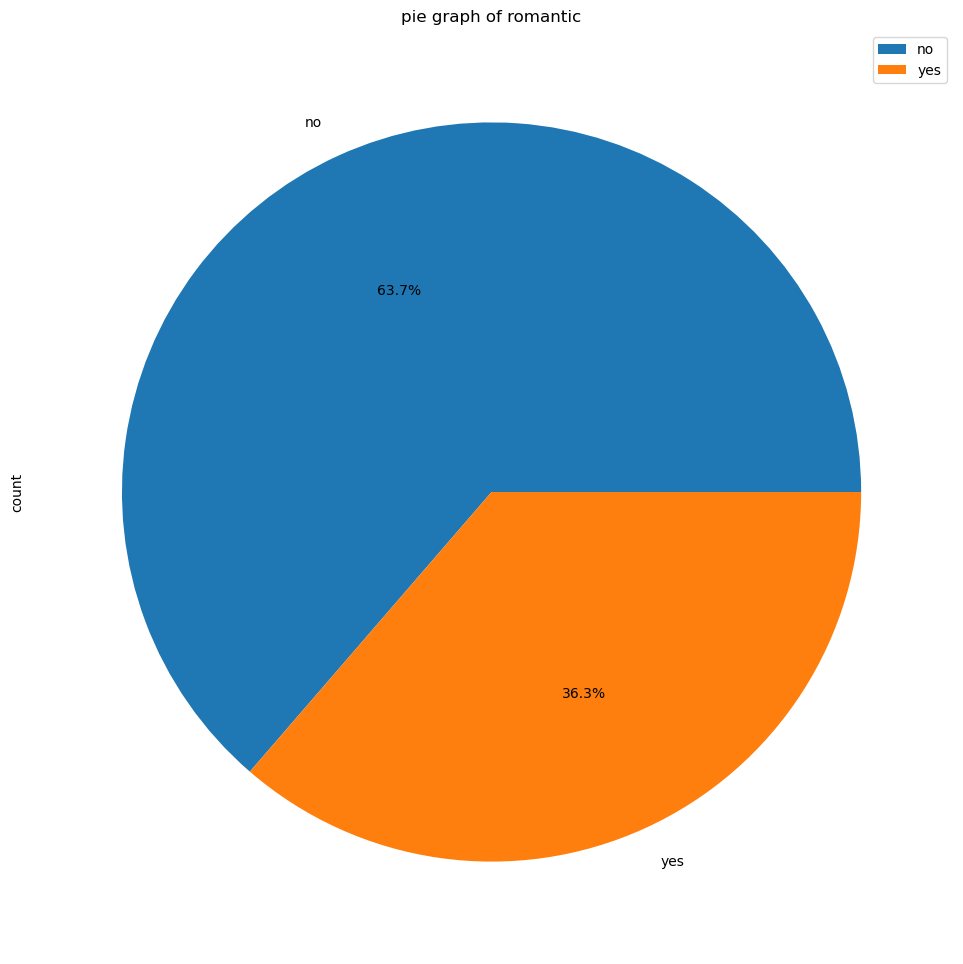

In [169]:
romantic = X_train['romantic'].value_counts()
print(romantic.to_frame())
graph_types_and_params = {
    "pie graph of romantic": {
        "method": romantic.plot.pie,
        "params": {"legend": True, "autopct": '%1.1f%%'}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(14, 12))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    plt.show()
# вывел графики

## Характеристика: "Alcohol Consumption"

          count
romantic       
no          289
yes         165


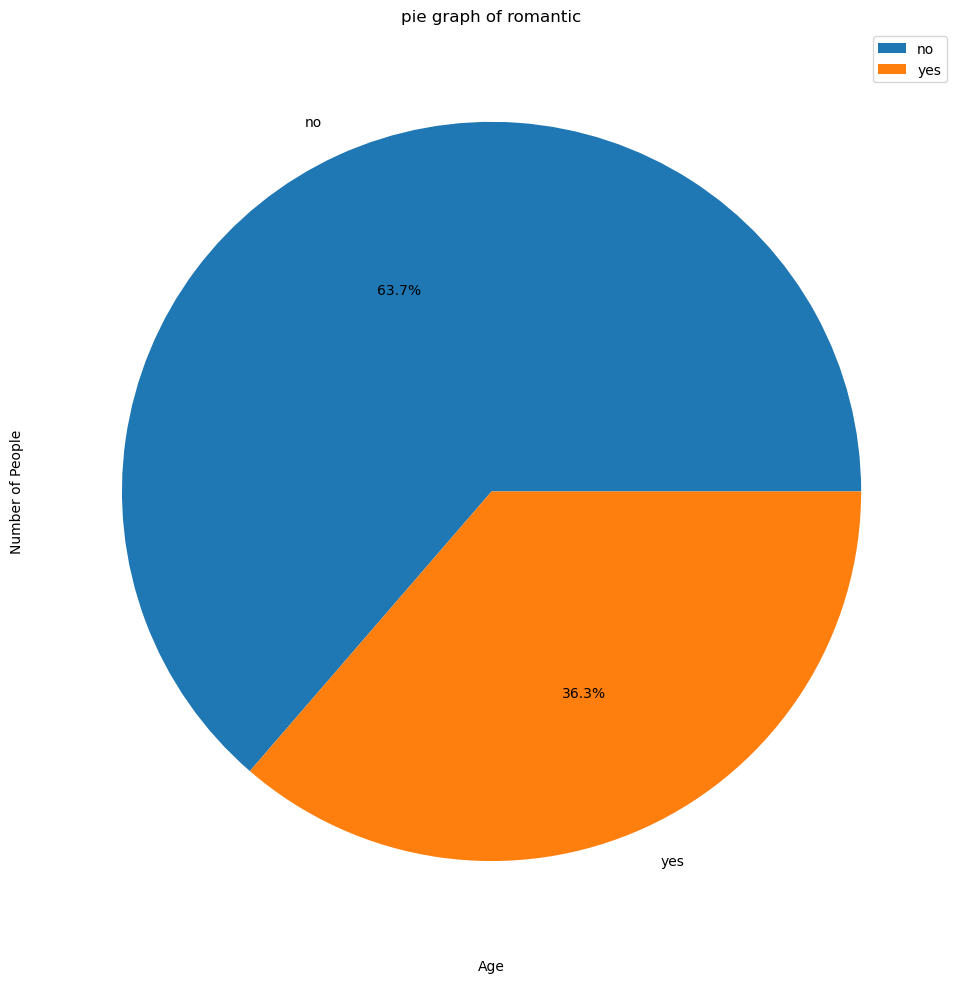

In [170]:
romantic = X_train['romantic'].value_counts()
print(romantic.to_frame())
graph_types_and_params = {
    "pie graph of romantic": {
        "method": romantic.plot.pie,
        "params": {"legend": True, "autopct": '%1.1f%%'}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(14, 12))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of People')
    plt.show()
# вывел графики

## Целевая зависимость: "G3" (Final Grade)

    count
G3       
10     70
11     69
13     60
12     47
14     47
15     36
9      26
8      26
16     23
17     21
0      10
7       8
18      6
6       2
19      1
1       1
5       1


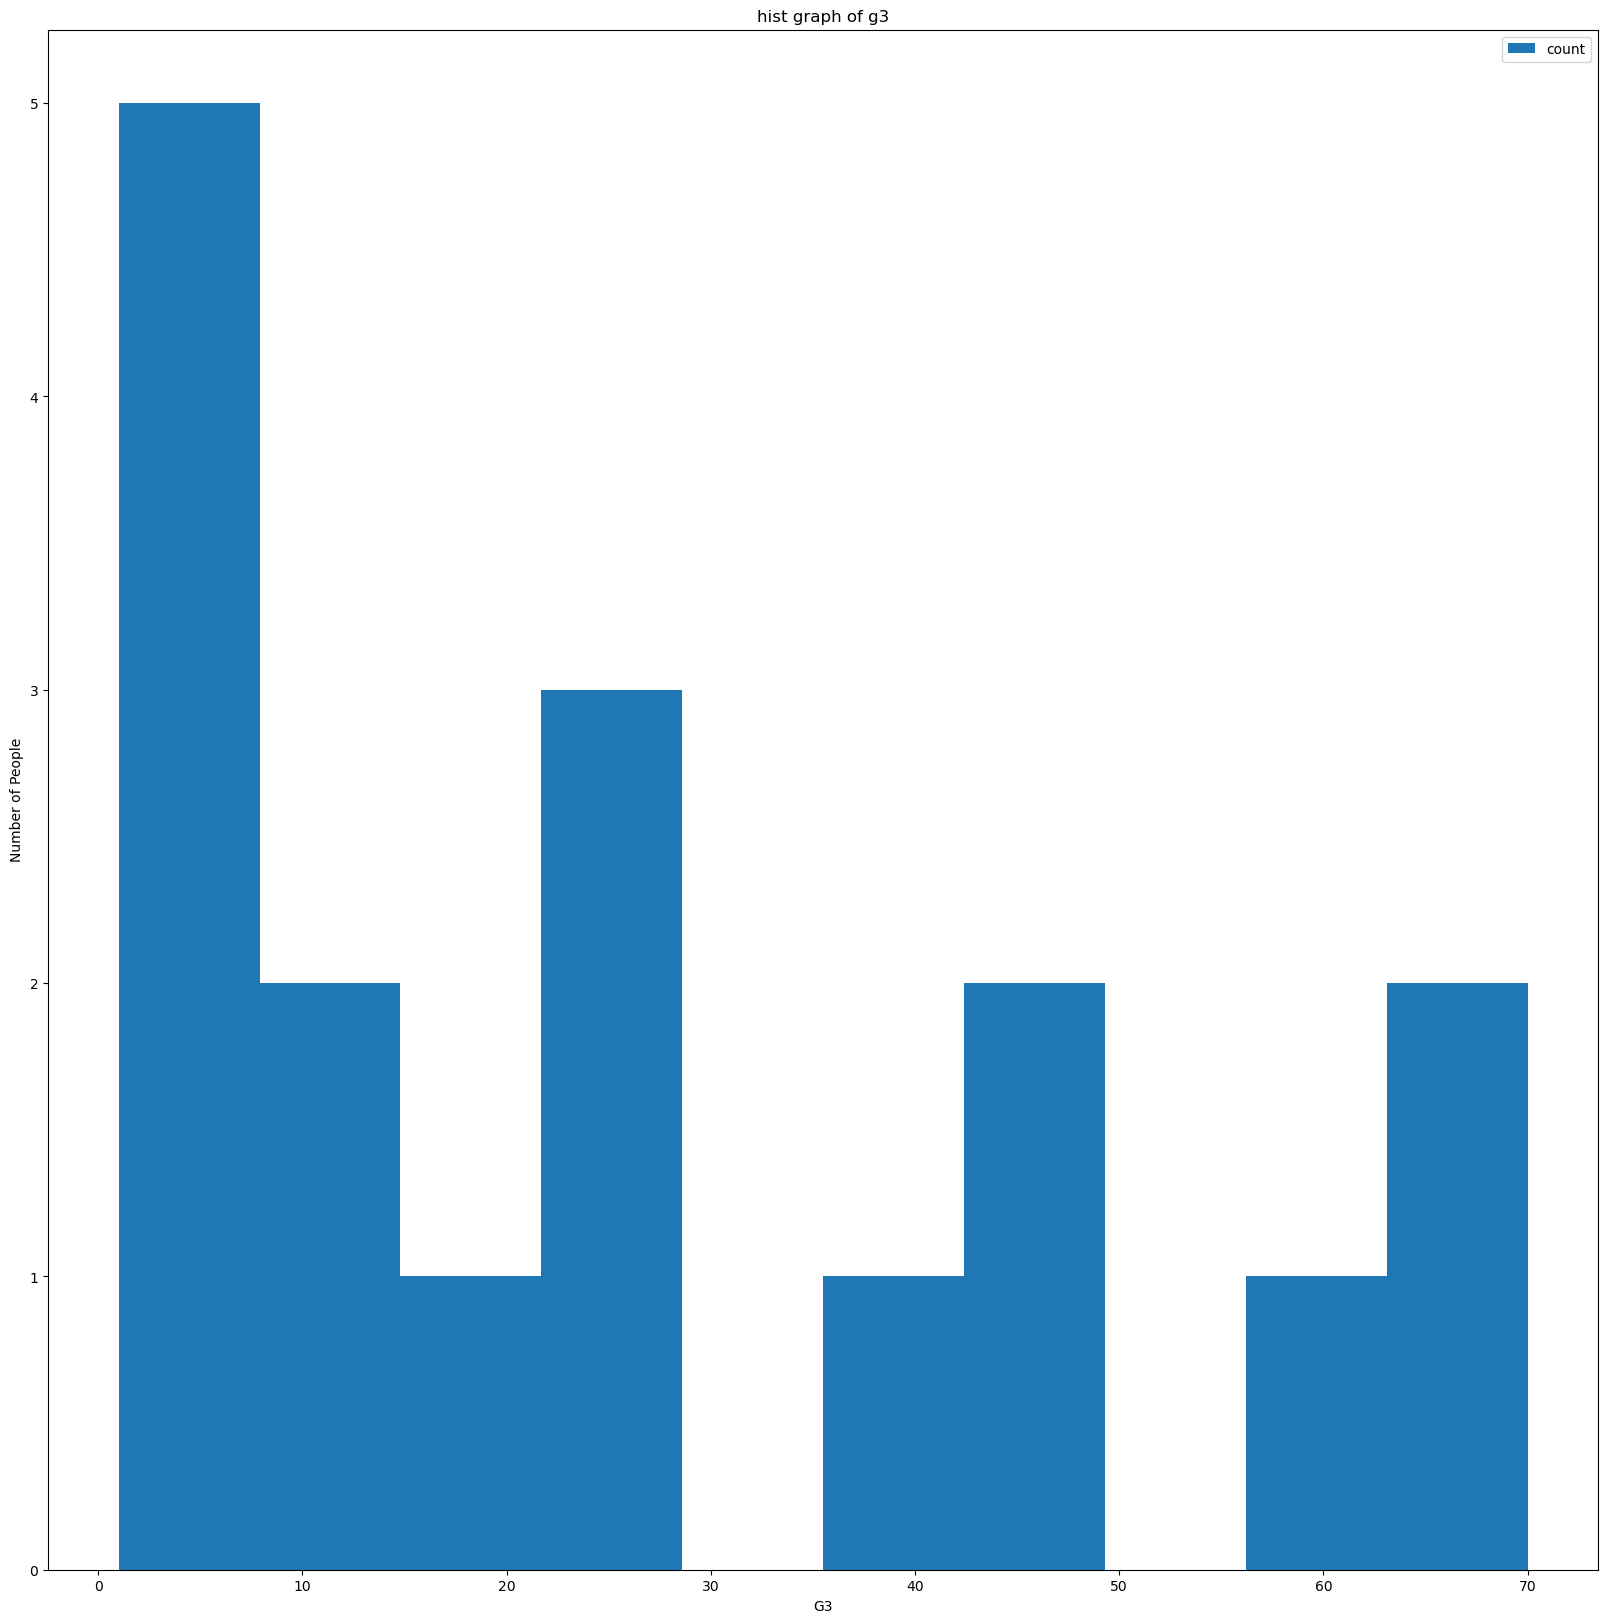

In [171]:
G3 = X_train['G3'].value_counts()
print(G3.to_frame())
graph_types_and_params = {
    "hist graph of g3": {
        "method": G3.plot.hist,
        "params": {"legend": True}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(20, 20))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    ax.set_xlabel('G3')
    ax.set_ylabel('Number of People')
    plt.show()
# вывел графики

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [172]:
# X_train.head(10)
X_train_with_dummies = pd.get_dummies(X_train, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "nursery", "higher", "internet", "romantic", "schoolsup", "famsup", "paid", "activities", ])
X_train_with_dummies.head(15)

pd.set_option('display.max_columns', None)

correlation_matrix = X_train_with_dummies.corr(method='pearson')
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_GP,school_MS,sex_A,sex_B,sex_C,sex_D,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes
age,1.000000,0.017118,0.015926,-0.045215,0.037509,-0.000269,0.050729,-0.048159,-0.019423,-0.033190,-0.038725,-0.105574,-0.026602,-0.031453,0.036387,-0.036387,-0.006958,-0.003339,-0.010578,-0.012381,-0.002133,0.006920,-0.026513,0.030608,0.009230,-0.009230,0.046201,-0.046201,0.026374,-0.033808,0.004992,0.018569,-0.044843,-0.018946,-0.024459,0.051781,-0.028022,-0.022653,-0.096287,0.061807,-0.022765,0.072010,0.003201,-0.009536,0.011859,-0.052510,0.052510,-0.002926,0.002926,-0.062224,0.062224,-0.101616,0.101616,-0.027630,0.027630,0.068190,-0.068190,0.018965,-0.018965,-0.046514,0.046514
Medu,0.017118,1.000000,0.650052,-0.292153,0.088940,-0.172137,0.068827,0.029327,0.055263,-0.011133,-0.021110,0.045795,0.018881,0.207645,0.293620,-0.293620,0.021253,-0.062649,-0.020698,-0.046488,-0.118258,0.134646,-0.214045,0.209874,-0.045143,0.045143,0.073721,-0.073721,-0.375522,0.247208,-0.206654,0.182602,0.415927,-0.064679,0.123571,-0.076899,-0.007277,0.203777,-0.110951,0.012576,-0.064544,0.168610,-0.038903,0.114482,-0.142651,-0.157157,0.157157,-0.217802,0.217802,-0.285134,0.285134,0.042563,-0.042563,-0.005233,0.005233,-0.090536,0.090536,-0.128237,0.128237,-0.137541,0.137541
Fedu,0.015926,0.650052,1.000000,-0.211014,0.077986,-0.157411,0.086715,0.032968,0.062423,-0.002507,-0.001616,0.086325,0.047975,0.196666,0.222724,-0.222724,-0.012994,-0.056691,0.030704,-0.029184,-0.059607,0.069815,-0.108147,0.104927,-0.002911,0.002911,0.018390,-0.018390,-0.185734,0.120057,-0.174274,0.121585,0.286423,-0.099234,0.197070,-0.177839,0.055842,0.302659,-0.045818,-0.033759,-0.062900,0.135725,0.117360,-0.048657,-0.107355,-0.090760,0.090760,-0.175819,0.175819,-0.208985,0.208985,0.038604,-0.038604,-0.027061,0.027061,-0.136851,0.136851,-0.116103,0.116103,-0.108572,0.108572
traveltime,-0.045215,-0.292153,-0.211014,1.000000,-0.084222,0.079322,-0.025235,0.003360,0.008395,0.078637,0.048305,-0.047959,-0.041817,-0.150548,-0.280402,0.280402,-0.036298,-0.036298,-0.036298,0.027335,-0.017041,0.021702,0.356639,-0.353442,-0.017090,0.017090,-0.058960,0.058960,0.183564,-0.085273,-0.015190,-0.051291,-0.089821,-0.051491,-0.074177,0.060274,-0.019540,0.021782,0.124136,-0.157535,0.121339,-0.077017,0.038468,-0.075304,0.072376,0.004786,-0.004786,0.054836,-0.054836,0.218173,-0.218173,0.016857,-0.016857,0.020125,-0.020125,0.031303,-0.031303,0.068298,-0.068298,0.062597,-0.062597
studytime,0.037509,0.088940,0.077986,-0.084222,1.000000,-0.125199,-0.024362,-0.075368,-0.098676,-0.152659,-0.243818,-0.052498,-0.099545,0.217938,0.122499,-0.122499,-0.051563,0.006382,-0.051563,-0.037724,0.204464,-0.188383,-0.089189,0.085192,0.034892,-0.034892,0.056920,-0.056920,-0.046687,-0.038620,0.036977,0.015771,0.015240,0.004460,0.107050,0.008371,-0.054546,0.011228,-0.065305,0.035254,-0.120783,0.130445,-0.048780,0.018614,0.047539,-0.064679,0.064679,-0.160473,0.160473,0.004829,-0.004829,-0.023561,0.023561,-0.126408,0.126408,-0.156323,0.156323,-0.003324,0.003324,-0.064708,0.064708
failures,-0.000269,-0.172137,-0.157411,0.079322,-0.125199,1.000000,-0.064462,0.112960,0.052652,0.153152,0.135870,0.045039,0.121685,-0.407549,-0.129884,0.129884,-0.018008,-0.018008,-0.018008,-0.005134,-0.080845,0.087508,0.065393,-0.055797,0.069871,-0.069871,0.015372,-0.015372,0.109969,-0.016092,-0.052868,0.040629,-0.109654,0.056964,-0.063153,-0.002938,0.023871,-0.073255,0.163580,-0.112460,0.048841,-0.118865,-0.103691,-0.05704

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

In [173]:
correlation_matrix = X_train_with_dummies.corr(method='spearman')
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_GP,school_MS,sex_A,sex_B,sex_C,sex_D,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes
age,1.000000,-0.104496,-0.104103,0.045757,0.014443,0.313380,0.004334,0.024655,0.173288,0.106105,0.109842,-0.060254,0.153987,-0.120943,-0.066986,0.066986,-0.032605,0.012353,-0.069868,-0.032850,0.044370,-0.028577,0.050992,-0.026615,0.016123,-0.016123,0.032095,-0.032095,0.071291,-0.115483,0.049351,-0.000681,-0.089778,0.060904,-0.112400,0.099403,-0.077761,-0.063860,-0.028643,-0.017076,0.038694,0.024554,-0.168891,-0.017367,0.311030,0.010255,-0.010255,0.252576,-0.252576,-0.034687,0.034687,-0.195666,0.195666,0.143163,-0.143163,0.104359,-0.104359,-0.028633,0.028633,0.008403,-0.008403
Medu,-0.104496,1.000000,0.649158,-0.292184,0.090921,-0.208397,0.065322,0.016949,0.053074,-0.004821,-0.024095,0.055713,0.024186,0.254410,0.295966,-0.295966,0.022223,-0.063706,-0.020371,-0.046086,-0.116667,0.132938,-0.214718,0.210777,-0.043236,0.043236,0.074673,-0.074673,-0.374122,0.244525,-0.207246,0.186156,0.412304,-0.067189,0.123181,-0.073830,-0.008356,0.201991,-0.109808,0.012974,-0.066792,0.168433,-0.040286,0.114418,-0.140230,-0.154658,0.154658,-0.216151,0.216151,-0.285811,0.285811,0.044403,-0.044403,-0.005301,0.005301,-0.092174,0.092174,-0.127562,0.127562,-0.135674,0.135674
Fedu,-0.104103,0.649158,1.000000,-0.218918,0.090104,-0.170617,0.069760,0.019026,0.059686,-0.001089,-0.011015,0.088271,0.059623,0.222376,0.225517,-0.225517,-0.011149,-0.060576,0.035491,-0.027545,-0.063574,0.073196,-0.114322,0.112657,0.001101,-0.001101,0.021848,-0.021848,-0.190708,0.117908,-0.168276,0.121878,0.284774,-0.099673,0.186154,-0.170760,0.060744,0.281945,-0.047661,-0.030223,-0.070610,0.139906,0.119752,-0.048426,-0.111761,-0.090833,0.090833,-0.180315,0.180315,-0.212034,0.212034,0.043050,-0.043050,-0.033456,0.033456,-0.134763,0.134763,-0.115438,0.115438,-0.102316,0.102316
traveltime,0.045757,-0.292184,-0.218918,1.000000,-0.117844,0.108612,-0.052389,0.007695,-0.002830,0.049697,0.028116,-0.074656,-0.002857,-0.163508,-0.323240,0.323240,-0.041182,-0.041182,-0.041182,0.033479,-0.002983,0.007661,0.376399,-0.365342,-0.011965,0.011965,-0.063913,0.063913,0.181020,-0.088006,-0.009981,-0.057084,-0.084574,-0.050892,-0.073620,0.056609,-0.014834,0.018795,0.110101,-0.165883,0.128926,-0.056867,0.040025,-0.083877,0.085317,0.014225,-0.014225,0.078217,-0.078217,0.205696,-0.205696,0.014195,-0.014195,0.046526,-0.046526,0.047259,-0.047259,0.058306,-0.058306,0.053714,-0.053714
studytime,0.014443,0.090921,0.090104,-0.117844,1.000000,-0.126567,0.004516,-0.086508,-0.109090,-0.180305,-0.249431,-0.080128,-0.114375,0.259593,0.135436,-0.135436,-0.057827,0.013778,-0.057827,-0.033385,0.237225,-0.221753,-0.099843,0.093836,0.039475,-0.039475,0.066549,-0.066549,-0.042850,-0.040612,0.039339,0.001931,0.026845,0.009305,0.083761,0.010877,-0.057031,0.024224,-0.068481,0.047495,-0.128228,0.127130,-0.050548,0.023106,0.042343,-0.055456,0.055456,-0.184063,0.184063,-0.000417,0.000417,-0.057440,0.057440,-0.117716,0.117716,-0.162745,0.162745,0.010583,-0.010583,-0.067512,0.067512
failures,0.313380,-0.208397,-0.170617,0.108612,-0.126567,1.000000,-0.060283,0.108229,0.037942,0.131170,0.101222,0.043899,0.113347,-0.464614,-0.198359,0.198359,-0.020330,-0.020330,-0.020330,0.009005,-0.042092,0.046214,0.090250,-0.079268,0.083736,-0.083736,-0.013288,0.013288,0.133258,-0.041459,-0.037946,0.020843,-0.118461,0.052323,-0.071295,-0.015208,0.046712,-0.082699,0.170447,-0.110970,0.060582,-0.137218,-0.097394,-0.072108,0.29

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [174]:
all_features = X_train.keys()
val_count_for_feature = {}
for k in all_features:
    val_count_for_feature[k] = (len(X_train[k].value_counts().keys()), sorted(X_train[k].value_counts().keys()))
val_count_for_feature

{'school': (2, ['GP', 'MS']),
 'sex': (6, ['A', 'B', 'C', 'D', 'F', 'M']),
 'age': (16,
  [-1.0,
   1.0,
   5.0,
   8.0,
   15.0,
   16.0,
   17.0,
   18.0,
   19.0,
   20.0,
   21.0,
   22.0,
   116.0,
   151.0,
   161.0,
   181.0]),
 'address': (2, ['R', 'U']),
 'famsize': (2, ['GT3', 'LE3']),
 'Pstatus': (2, ['A', 'T']),
 'Medu': (5, [0, 1, 2, 3, 4]),
 'Fedu': (5, [0, 1, 2, 3, 4]),
 'Mjob': (5, ['at_home', 'health', 'other', 'services', 'teacher']),
 'Fjob': (5, ['at_home', 'health', 'other', 'services', 'teacher']),
 'reason': (4, ['course', 'home', 'other', 'reputation']),
 'guardian': (3, ['father', 'mother', 'other']),
 'traveltime': (4, [1, 2, 3, 4]),
 'studytime': (4, [1, 2, 3, 4]),
 'failures': (4, [0, 1, 2, 3]),
 'schoolsup': (2, ['no', 'yes']),
 'famsup': (2, ['no', 'yes']),
 'paid': (2, ['no', 'yes']),
 'activities': (2, ['no', 'yes']),
 'nursery': (2, ['no', 'yes']),
 'higher': (2, ['no', 'yes']),
 'internet': (2, ['no', 'yes']),
 'romantic': (2, ['no', 'yes']),
 'famrel'

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

     count
sex       
F       16
M       15


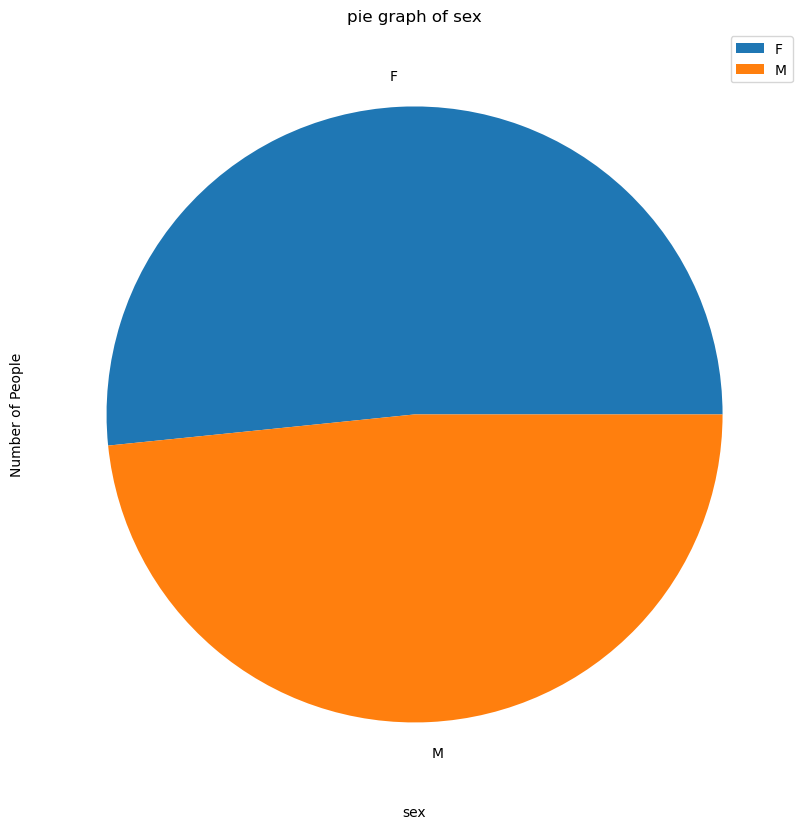

In [181]:
students_with_time_bigger_than_30_min = X_train.loc[X_train['traveltime'] > 2]
students_with_time_bigger_than_30_min_and_G3_is_bigger_than_10 = students_with_time_bigger_than_30_min.loc[students_with_time_bigger_than_30_min["G3"] > 10]
sex = students_with_time_bigger_than_30_min_and_G3_is_bigger_than_10['sex'].value_counts()
print(sex.to_frame())
graph_types_and_params = {
    "pie graph of sex": {
        "method": sex.plot.pie,
        "params": {"legend": True}
    }
}
for graph_type, method_and_params_dict in graph_types_and_params.items():
    plt.figure(figsize=(10, 10))
    ax = method_and_params_dict["method"](**method_and_params_dict["params"])
    ax.set_title(graph_type, y=1)
    ax.set_xlabel('sex')
    ax.set_ylabel('Number of People')
    plt.show()

## Построить boxplot для оценок по возрасту.  

<Axes: title={'center': 'G3'}, xlabel='[age]'>

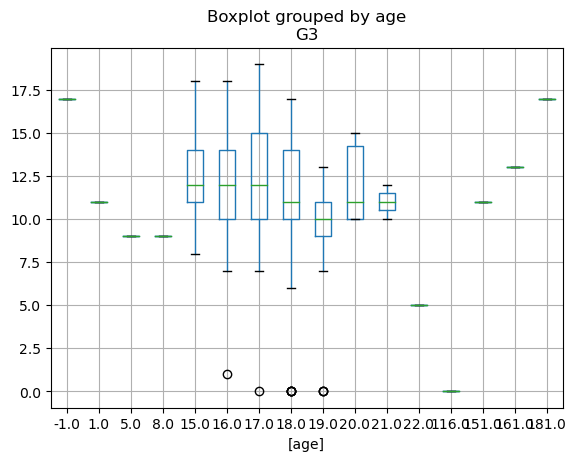

In [176]:
boxplot = X_train.boxplot(column=['G3'], by=['age'])
boxplot

## Найти id топ-5 самых юных отличников.

In [177]:
X_train.sort_values(by=["G3", "age"], ascending=[False, True]).head(5)
# ниже выводятся 5 строк с самыми лучшими по G3 учениками и самыми юными

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
74,GP,F,17.0,R,LE3,T,3,1,services,other,reputation,mother,2,4,0,no,yes,no,no,yes,yes,no,no,3,1,2,1,1,3,0,19
109,GP,M,15.0,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18
151,MS,F,16.0,R,LE3,T,1,1,at_home,other,course,father,3,2,0,no,yes,no,no,yes,yes,no,no,5,3,2,1,1,1,0,18
221,GP,M,17.0,U,LE3,A,3,2,other,other,reputation,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,4,4,1,2,5,10,18
294,GP,M,17.0,R,GT3,T,1,2,at_home,at_home,home,mother,1,2,0,no,yes,no,yes,no,yes,no,yes,3,5,2,2,2,1,2,18


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [197]:
all_ages = X_train['age'].unique()
# print(all_ages)
# X_train.loc[X_train['age'].isna()]

age_to_min_and_max_grade = {}
for age in all_ages:
    # print(f"{age=} {type(age)=}")
    age_people = X_train.loc[X_train["age"].isna()] if age is None else X_train.loc[X_train['age'] == age]
    # print(f"{age_people=}")
    # print(f"{age_people['G3'].max()=}")
    age_to_min_and_max_grade[age] = {"min": age_people['G3'].min(), "max": age_people['G3'].max()}
print(f"{age_to_min_and_max_grade=}")
df = pd.DataFrame.from_dict(age_to_min_and_max_grade)
df

age_to_min_and_max_grade={nan: {'min': nan, 'max': nan}, 15.0: {'min': 8, 'max': 18}, 17.0: {'min': 0, 'max': 19}, 20.0: {'min': 10, 'max': 15}, 18.0: {'min': 0, 'max': 17}, 16.0: {'min': 1, 'max': 18}, 19.0: {'min': 0, 'max': 13}, 161.0: {'min': 13, 'max': 13}, 181.0: {'min': 17, 'max': 17}, 151.0: {'min': 11, 'max': 11}, 116.0: {'min': 0, 'max': 0}, 21.0: {'min': 10, 'max': 12}, 22.0: {'min': 5, 'max': 5}, -1.0: {'min': 17, 'max': 17}, 1.0: {'min': 11, 'max': 11}, 5.0: {'min': 9, 'max': 9}, 8.0: {'min': 9, 'max': 9}}


,NaN,15.0,17.0,20.0,18.0,16.0,19.0,161.0,181.0,151.0,116.0,21.0,22.0,-1.0,1.0,5.0,8.0
min,NaN,8,0,10,0,1,0,13,17,11,0,10,5,17,11,9,9
max,NaN,18,19,15,17,18,13,13,17,11,0,12,5,17,11,9,9


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

In [205]:
# TODO надо поправить None в возрасте, надо поправить мусорные значения в sex
X_train['sex'].value_counts()
X_train.loc[(X_train['sex'] != 'F') & (X_train['sex'] != 'M'), 'sex'] = 'M' # заменил мусорные значения пола на значение Male (не выкинул данные что не рекомендуется, но добавил male которых меньше)
X_train['sex'].value_counts()
X_train.loc[X_train['age'].isna(), 'age'] = 0 # исправил None в age на ноль

## Удалите скоррелированные данные

In [ ]:
# корреляции выше 0.65 не было, поэтому кажется что удалять нечего

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

## Закодируйте категориальные признаки

In [208]:
# накидываем и сохраняем dummy_values, которые использовались выше при построении матрицы корелляции
X_train = pd.read_csv('train_features_with_answers.csv')
X_train = pd.get_dummies(X_train, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "nursery", "higher", "internet", "romantic", "schoolsup", "famsup", "paid", "activities", ])
X_train.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_GP,school_MS,sex_A,sex_B,sex_C,sex_D,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes
0,NaN,1,3,1,1,0,4,3,3,2,3,3,0,9,False,True,False,False,False,False,False,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,True,False
1,NaN,3,3,3,1,0,3,3,4,3,5,3,16,12,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,True,False,True,False,False,True,True,False,False,True
2,15.0,3,4,1,2,0,5,5,1,1,1,5,0,13,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,True,True,False,False,True
3,17.0,4,3,2,2,1,4,5,5,1,3,2,4,11,False,True,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,True
4,20.0,2,1,2,2,0,1,2,3,1,2,2,8,12,True,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,False,True,True,False,False,True,False,True,False,True
5,17.0,2,3,2,2,0,4,2,1,1,1,3,2,14,True,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,True,False,False,True
6,18.0,3,3,1,2,0,4,1,3,1,2,1,1,16,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False
7,17.0,1,1,1,1,0,4,3,2,1,2,5,9,10,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,False,True
8,15.0,1,1,1,2,0,4,3,2,2,3,4,2,12,True,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,True,False,False,True,True,False,False,True
9,18.0,2,1,1,2,0,5,2,4,1,2,4,2,16,True,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,True,False,False,True


## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [ ]:
# Ваш код
from sklearn.model_selection import cross_val_score # буду использовать кросс-валидацию

## Разделите данные и объясните выбор стратегии

In [241]:
import numpy as np
# Ваш код
from sklearn.model_selection import train_test_split
data_for_train = pd.read_csv('train_features_with_answers.csv') # считал данные

X, y = data_for_train.drop('G3', axis=1), data_for_train['G3'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5) # random_state указан классическим значением 42, выборка разбита пополам
X_train, X_test, y_train, y_test

(    school  sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
 325     MS    F  17.0       U     GT3       A     1     1   at_home   at_home   
 397     GP  NaN  16.0       U     GT3       T     3     2     other     other   
 97      GP    F  16.0       U     GT3       T     2     2  services  services   
 360     GP    F  17.0       U     GT3       T     3     4  services     other   
 68      GP    M   NaN       U     GT3       T     3     3  services     other   
 ..     ...  ...   ...     ...     ...     ...   ...   ...       ...       ...   
 106     GP    F   NaN       U     LE3       A     3     4     other     other   
 270     GP    F  17.0       U     GT3       T     3     4   at_home  services   
 348     MS    M  17.0       R     LE3       T     2     2  services  services   
 435     MS    F  19.0       U     GT3       T     1     1     other     other   
 102     GP    M  17.0       R     GT3       T     2     2     other     other   
 
      reason g

__Ваш ответ:__ ...

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [242]:
from pandas import array

# Ваш код
# указал явно допустимые диапазоны значений, от которых можно вызвать assert для проверки
# какие-то поля нужно проверять для более общих случаев (например, поле abscences может быть от 0 до 93) - но мне лень,
# методом пристального взгляда видно что данные лежат в корректных диапазонах значений
assert_data = {'school': array(['MS', 'GP'], dtype=object),
 'sex': array(['M', 'F', np.nan], dtype=object),
 'age': array([ np.nan,  15.,  17.,  20.,  18.,  16.,  19.,
         21.,  22.,]),
 'address': array(['U', 'R', np.nan], dtype=object),
 'famsize': array(['LE3', 'GT3'], dtype=object),
 'Pstatus': array(['T', 'A'], dtype=object),
 'Medu': array([1, 3, 4, 2, 0]),
 'Fedu': array([3, 4, 1, 2, 0]),
 'Mjob': array(['at_home', 'teacher', 'other', 'services', 'health'], dtype=object),
 'Fjob': array(['services', 'other', 'at_home', 'teacher', 'health'], dtype=object),
 'reason': array(['course', 'home', 'reputation', 'other'], dtype=object),
 'guardian': array(['mother', 'father', 'other'], dtype=object),
 'traveltime': array([1, 3, 2, 4]),
 'studytime': array([1, 2, 3, 4]),
 'failures': array([0, 1, 2, 3]),
 'schoolsup': array(['no', 'yes'], dtype=object),
 'famsup': array(['no', 'yes'], dtype=object),
 'paid': array(['no', 'yes'], dtype=object),
 'activities': array(['no', 'yes'], dtype=object),
 'nursery': array(['yes', 'no'], dtype=object),
 'higher': array(['no', 'yes'], dtype=object),
 'internet': array(['yes', 'no'], dtype=object),
 'romantic': array(['yes', 'no'], dtype=object),
 'famrel': array([4, 3, 5, 1, 2]),
 'freetime': array([3, 5, 2, 1, 4]),
 'goout': array([3, 4, 1, 5, 2]),
 'Dalc': array([2, 3, 1, 5, 4]),
 'Walc': array([3, 5, 1, 2, 4]),
 'health': array([3, 5, 2, 1, 4]),
 'absences': array([ 0, 16,  4,  8,  2,  1,  9,  6,  5, 11,  3, 10, 12, 14, 18, 15, 24,
        22, 32, 21, 13,  7]),
 'G3': array([ 9, 12, 13, 11, 14, 16, 10, 17,  8, 15,  0,  6,  7, 19, 18,  1,  5])
 }
data_for_train = pd.read_csv('train_features_with_answers.csv') # считал данные
# корректирую данные (указываю NaN для невалидных значений
data_for_train['sex'].value_counts()
data_for_train.loc[(data_for_train['sex'] != 'F') & (data_for_train['sex'] != 'M'), 'sex'] = np.nan # заменил мусорные значения пола на значение None
data_for_train.loc[(data_for_train['age'] < 15) | (data_for_train['age'] > 22), 'age'] = np.nan # заменил неположительный возраст или более 22 лет на None

for k in data_for_train.keys():
    # print(f"unique values for {k} are: {data_for_train[k].unique()}")
    for v in data_for_train[k].unique():
        assert v in assert_data[k]

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [285]:
# Ваш код
from sklearn.neighbors import KNeighborsClassifier
data_without_G3 = data_for_train.drop('G3', axis=1) # убрал G3 из данных
# предскажем характеристику пола для nan данных
# в качестве тренировочной и тестовой выборки нужно брать только те данные, в которых sex/age не nan (потому что knn не съест none значения)
data_without_G3_with_not_nan_sex = data_without_G3.loc[(data_without_G3['sex'].notna() & data_without_G3['age'].notna())]
# накидываем dummy values на строковые характеристики
data_without_G3_with_not_nan_sex = pd.get_dummies(data_without_G3_with_not_nan_sex, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "nursery", "higher", "internet", "romantic", "schoolsup", "famsup", "paid", "activities", ])
# print(data_without_G3_with_not_nan_sex.head(5))
X, y = data_without_G3_with_not_nan_sex.drop(['sex_F', 'sex_M'], axis=1), data_without_G3_with_not_nan_sex[['sex_F', 'sex_M']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) # random_state указан классическим значением 42, выборка разбита в отношении 1 к 5
knn = KNeighborsClassifier(n_neighbors=5) # knn с количеством соседей 1
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test.values) # увидел ошибку в либе, поправил в соответствии с коментом https://github.com/scikit-learn/scikit-learn/issues/26768
print("Прогнозы для тестового набора (определяем 'sex_F', 'sex_M'):\n {}".format(y_pred[:5:1]))
print("Правильность на тестовом наборе (определяем 'sex_F', 'sex_M'): {:.2f}".format(np.mean(y_pred == y_test))) # получилось 0.75, что неплохо


Прогнозы для тестового набора (определяем 'sex_F', 'sex_M'):
 [[ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]]
Правильность на тестовом наборе (определяем 'sex_F', 'sex_M'): 0.75


/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [326]:
# Ваш код
from sklearn.neighbors import KNeighborsRegressor
# предскажем характеристику возраста для nan данных
# в качестве тренировочной и тестовой выборки нужно брать только те данные, в которых sex/age не nan (потому что knn не съест none значения)
data_without_G3_with_not_nan_sex = data_without_G3.loc[(data_without_G3['sex'].notna() & data_without_G3['age'].notna())]
# накидываем dummy values на строковые характеристики
data_without_G3_with_not_nan_sex = pd.get_dummies(data_without_G3_with_not_nan_sex, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "nursery", "higher", "internet", "romantic", "schoolsup", "famsup", "paid", "activities", ])
# print(data_without_G3_with_not_nan_sex.head(5))
X, y = data_without_G3_with_not_nan_sex.drop(['age'], axis=1), data_without_G3_with_not_nan_sex['age'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1) # random_state указан классическим значением 42, выборка разбита в отношении 1 к 5
knn_reg = KNeighborsRegressor(n_neighbors=20) # knn с количеством соседей 1
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test.values) # увидел ошибку в либе, поправил в соответствии с коментом https://github.com/scikit-learn/scikit-learn/issues/26768
print("Прогнозы для тестового набора (определяем 'age'):\n {}".format(y_pred[:5:1]))
print(f"{y_pred=}")
print(f"{y_test.values=}")
print("R^2 на тренировочном наборе наборе: {:.2f}".format(knn_reg.score(X_train, y_train))) # тут 0.14
print("R^2 на тестовом наборе: {:.2f}".format(knn_reg.score(X_test, y_test))) # тут 0.18

Прогнозы для тестового набора (определяем 'age'):
 [16.75 16.15 16.45 16.35 16.45]
y_pred=array([16.75, 16.15, 16.45, 16.35, 16.45, 16.5 , 17.  , 16.85, 16.15,
       17.05, 16.6 , 16.55, 16.7 , 16.5 , 16.35, 16.9 , 17.15, 16.45,
       16.9 , 16.55, 16.15, 17.15, 17.35, 16.75, 17.  , 17.55, 16.5 ,
       16.55, 16.8 , 16.65, 16.6 , 16.6 , 16.55, 16.85, 16.95, 16.15,
       17.2 , 16.75, 16.8 , 16.65, 16.85])
y_test.values=array([18., 16., 17., 17., 16., 16., 15., 18., 16., 18., 18., 16., 16.,
       17., 17., 19., 17., 16., 17., 18., 15., 19., 18., 16., 16., 19.,
       18., 17., 17., 18., 16., 15., 16., 18., 16., 15., 18., 18., 15.,
       15., 16.])
R^2 на тренировочном наборе наборе: 0.14
R^2 на тестовом наборе: 0.18


/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

## KNN

In [371]:
# в условии не сказано, что нужно заполнить пропуски в данных при обучении.
# а я не уверен, что это необходимо делать - ведь заполнены они не гарантированно верно, будут вносить не совсем корректный вес в зависимость
from sklearn.neighbors import KNeighborsClassifier
# в качестве тренировочной и тестовой выборки нужно брать только те данные, в которых sex/age не nan (потому что knn не съест none значения)
data_with_not_nan_values = data_for_train.loc[(data_for_train['sex'].notna() & data_for_train['age'].notna())]
# накидываем dummy values на строковые характеристики
data_with_not_nan_values = pd.get_dummies(data_with_not_nan_values, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "nursery", "higher", "internet", "romantic", "schoolsup", "famsup", "paid", "activities", ])
# print(data_without_G3_with_not_nan_sex.head(5))
X, y = data_with_not_nan_values.drop(['G3'], axis=1), data_with_not_nan_values['G3'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1) # random_state указан классическим значением 42, выборка разбита в отношении 1 к 5
knn = KNeighborsClassifier(n_neighbors=2) # knn с количеством соседей 2
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test.values) # увидел ошибку в либе, поправил в соответствии с коментом https://github.com/scikit-learn/scikit-learn/issues/26768
print("Прогнозы для тестового набора (определяем 'G3'):\n {}".format(y_pred[:5:1]))
print("Правильность на тестовом наборе (определяем 'G3'): {:.2f}".format(np.mean(y_pred == y_test)))
print(y_pred[:10:1])
print(y_test.values[:10:1])



Прогнозы для тестового набора (определяем 'G3'):
 [13 10 14 10 12]
Правильность на тестовом наборе (определяем 'G3'): 0.20
[13 10 14 10 12 11 10 11 16 10]
[17 13  0 10 11 15 11 10 13 10]


/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Bayes

In [370]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test.values)
print("Количество неугаданных значений из %d значений : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Правильность на тестовом наборе (определяем 'G3'): {:.2f}".format(np.mean(y_pred == y_test)))
print(y_pred[:10:1])
print(y_test.values[:10:1])


Количество неугаданных значений из 41 значений : 39
Правильность на тестовом наборе (определяем 'G3'): 0.05
[18  7 14 15 18 17 18  7 17 15]
[17 13  0 10 11 15 11 10 13 10]


/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Регрессия

In [369]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_pred = [int(_) for _ in lnr.predict(X_test)]
print("R^2 на тренировочном наборе наборе: {:.2f}".format(lnr.score(X_train, y_train))) # тут 0.43
print("R^2 на тестовом наборе: {:.2f}".format(lnr.score(X_test, y_test))) # тут 0.18
print(y_pred[:10:1])
print(y_test.values[:10:1])
y_test

R^2 на тренировочном наборе наборе: 0.43
R^2 на тестовом наборе: 0.18
[13, 12, 11, 12, 12, 12, 12, 12, 11, 10]
[17 13  0 10 11 15 11 10 13 10]


190    17
153    13
142     0
108    10
82     11
37     15
424    11
244    10
332    13
248    10
148    14
243    12
311    14
357    17
174     9
103    10
341    14
91     13
11     10
90     12
427    12
261     9
34     12
83      8
223    16
61     11
413    10
213    10
308    15
119    14
442    13
231    14
251    17
17     14
271    13
2      13
359    14
292     6
125    12
326    12
97     12
Name: G3, dtype: int64

## SVM

In [368]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Правильность на тестовом наборе (определяем 'G3'): {:.2f}".format(np.mean(y_pred == y_test)))
print("R^2 на тестовом наборе: {:.2f}".format(svm.score(X_test, y_test))) # тут 0.18
print(y_pred[:10:1])
print(y_test.values[:10:1])

Правильность на тестовом наборе (определяем 'G3'): 0.10
R^2 на тестовом наборе: 0.10
[13 11 11 11 11 11 11 11 11 10]
[17 13  0 10 11 15 11 10 13 10]


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

In [382]:
# беру модели классификации, и комбинирую их результат с помощью VotingClassifier
from sklearn.ensemble import VotingClassifier
svm = SVC(probability=True)
classification_ensemble = VotingClassifier(estimators=[('KNN', knn), ('SVC', svm), ('bayes', gnb)], voting='soft', weights=[1,1,1])
score_ensemble = classification_ensemble.fit(X_train, y_train)
y_pred = score_ensemble.predict(X_test.values)
print(f"score={score_ensemble.score(X_test.values, y_test.values)}")
print(f"{y_pred[:5:1]=}")
print(f"{y_test.values[:5:1]=}")
# скор маленький у ансамбля, не вижу смысла его применять для итогового предсказания, бахну knn

score=0.0975609756097561
y_pred[:5:1]=array([18,  7, 14, 15, 18])
y_test.values[:5:1]=array([17, 13,  0, 10, 11])


/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC w

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [393]:
# Для jupyter notebook

submission = pd.read_csv('sample_submission.csv', index_col='id')
data_without_G3 = data_for_train.drop('G3', axis=1)
data_without_G3.loc[data_without_G3['sex'].isna(), "sex"] = "M"
data_without_G3.loc[data_without_G3['age'].isna(), "age"] = 18
data_without_G3 = pd.get_dummies(data_without_G3, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "nursery", "higher", "internet", "romantic", "schoolsup", "famsup", "paid", "activities", ])
y_pred = knn.predict(data_without_G3.values) # увидел ошибку в либе, поправил в соответствии с коментом https://github.com/scikit-learn/scikit-learn/issues/26768
print(len(y_pred))
print(y_pred)
submission['G3'] = y_pred[:195] # ваше предсказание
submission.to_csv('submission.csv', index=False)

454
[10 12 14  8 12 13 15  7 12 16 14 10 13 13 14  8  9 14 12 10 10  8 11 12
 11 13 12 11 11 13 15 14 13 10 11 11 12 11  0 10 12 11  0 11 15 10  9 10
 14 10 13 14 11 10 13 11  6  1  7 10 10  8 14 11 10 10 13 11 13  9 10 14
  7 11 16 10  9  9 11 11 12 11 12 14  9 11 10 11  0  0 11 14 12 12  1 14
 12 12 11 10 12 15 13  9 11  8 12 15 10 18 13  9 12 13 12 10 14 17  7 13
 11 14 15  8  8 14 11 11 10  8  0  9 13 11 11  8  7 14 13 10 10 14 14 16
 16  8 14 11 12  8 12 14  8 10 15 13 10 10  9  8  8 11 10 11 12  0 12 10
 11  8  9  9 10 13 11  8  9 10  8 11 13 13  9 10 11 11 10 10 13 10 13  0
 17  9 10 12 11 12  8 13 13 10 13 12 11 11 16 12 13 11 10  8 11 11  9 13
 15 11  7 12  8 14 11 10 10 11 10 10  9  7 10 15  8 16 10 13 11 10 11 11
  8 15 11 12 11  9  5 13 10  8 13 12 11 12 10 13 11 12  9 12  0  7  0  9
 12 10 12 12 13 12  8 13  8 10 13  7 13 13  8  9 13 10 13 14 14  9 10 10
  8 12 11  9 10 10 13 14 11 11 13 15  7 10  8 11 13  7  9 10 13 13  8 13
 13  9  7 13 10 12  9 10  0  8 11 11  9 10 14 1

/Users/viktorzadabin/anaconda3/envs/ML_course/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Для colab notebook

from google.colab import files

pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)
files.download('data/submission.csv')

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.